In [26]:
import pandas as pd
import psycopg2
import config
import plotly.express as px

In [3]:
db_conn_risk = psycopg2.connect(
    host=config.DB_RISK_HOST,
    dbname=config.DB_RISK_NAME,
    user=config.DB_RISK_USER,
    password=config.DB_RISK_PASS,
)

In [4]:
query  = "select * from b3up2data.equities_tradeinformationfile where tckrsymb in ('SANB11','SANB3','SANB4')"

In [14]:
df = pd.read_sql(query,db_conn_risk)

In [15]:
df = df[['rptdt','tckrsymb','lastpric']]

In [16]:
sanb3 = df[df['tckrsymb']=='SANB3'].rename(columns={'lastpric':'SANB3'})[['rptdt','SANB3']]
sanb4 = df[df['tckrsymb']=='SANB4'].rename(columns={'lastpric':'SANB4'})[['rptdt','SANB4']]
sanb11 = df[df['tckrsymb']=='SANB11'].rename(columns={'lastpric':'SANB11'})[['rptdt','SANB11']]

In [17]:
df =sanb11.merge(sanb3,on='rptdt',how='inner')

In [19]:
df = df.merge(sanb4,on='rptdt',how='inner')

In [21]:
df['pu'] = df['SANB4'] + df['SANB3'] - df['SANB11']  

<AxesSubplot:xlabel='rptdt'>

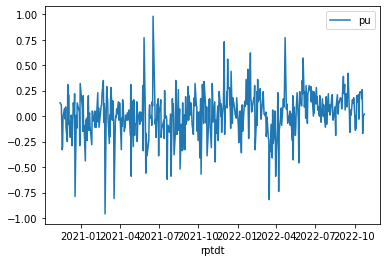

In [23]:
df[['rptdt','pu']].set_index('rptdt').plot()

In [47]:
df_agg = pd.read_excel('sanb_2710.xlsx',sheet_name='Sheet2')

In [49]:
df_agg.columns = ['Data','SANB3','SANB4','SANB11','PU']

In [50]:
df_agg = df_agg.sort_values('Data',ascending=True)

In [51]:
df_agg

,Data,SANB3,SANB4,SANB11,PU
0,2022-10-26 10:08:00,14.09,15.58,28.30,1.37
1,2022-10-26 10:09:00,13.50,15.20,28.53,0.17
2,2022-10-26 10:10:00,13.03,15.07,27.98,0.12
3,2022-10-26 10:11:00,13.03,14.56,27.45,0.14
4,2022-10-26 10:12:00,13.10,14.73,27.73,0.10
...,...,...,...,...,...
377,2022-10-26 16:50:00,13.56,15.05,28.54,0.07
378,2022-10-26 16:51:00,13.57,15.06,28.57,0.06
379,2022-10-26 16:53:00,13.57,15.05,28.51,0.11
380,2022-10-26 16:54:00,13.58,15.05,28.48,0.15


In [45]:
df_agg['str_Data'] = df_agg['Data'].astype(str)

In [53]:
fig = px.line(df_agg,x='Data',y='PU')
# fig.update_xaxes(type='category')

fig.show()